##**Q3**

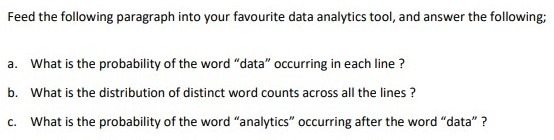

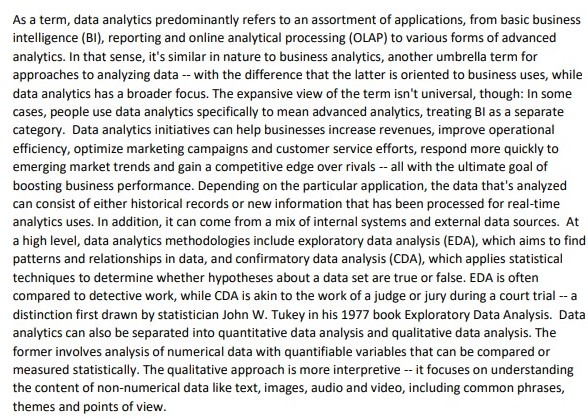

##**Solution**

##a

In [27]:
# Input text from question
text = """As a term, data analytics predominantly refers to an assortment of applications, from basic \nbusiness intelligence (BI), reporting and online analytical processing (OLAP) to various forms of \nadvanced analytics. In that sense, it's similar in nature to business analytics, another umbrella \nterm for approaches to analyzing data -- with the difference that the latter is oriented to \nbusiness uses, while data analytics has a broader focus. The expansive view of the term isn't \nuniversal, though: In some cases, people use data analytics specifically to mean advanced \nanalytics, treating BI as a separate category. Data analytics initiatives can help businesses \nincrease revenues, improve operational efficiency, optimize marketing campaigns and customer \nservice efforts, respond more quickly to emerging market trends and gain a competitive edge \nover rivals -- all with the ultimate goal of boosting business performance. Depending on the \nparticular application, the data that's analyzed can consist of either historical records or new \ninformation that has been processed for real-time analytics uses. In addition, it can come from a \nmix of internal systems and external data sources. At a high level, data analytics methodologies \ninclude exploratory data analysis (EDA), which aims to find patterns and relationships in data, \nand confirmatory data analysis (CDA), which applies statistical techniques to determine whether \nhypotheses about a data set are true or false. EDA is often compared to detective work, while \nCDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by \nstatistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also \nbe separated into quantitative data analysis and qualitative data analysis. The former involves \nanalysis of numerical data with quantifiable variables that can be compared or measured \nstatistically. The qualitative approach is more interpretive -- it focuses on understanding the \ncontent of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."""

In [28]:
#Convert all element in text become lower case
text = text.lower()

In [32]:
#Split and sum length line from text
lines = text.splitlines()
nlines = len(lines)
print(f"Length line from the text: {nlines}")

Length line from the text: 23


In [47]:
# Count sum of words and "data"
import re
from collections import Counter

def tokenize(string):
    return re.compile('\w+').findall(string)

def word_freq(string): 
    text = tokenize(string.lower())
    a = Counter(text)           # count the words
    return (dict(a))    # return a tuple of counted words and letters


words = word_freq(text) # count and get dicts with counts

print(f"Length word from the text: {len(words)}") # length word

Length word from the text: 194


In [48]:
# Count each word in text
{k:v for (k,v) in words.items() if v>8 }

{'a': 10, 'analytics': 10, 'and': 9, 'data': 18, 'of': 10, 'the': 11, 'to': 11}

In [52]:
data_count = words['data'] #count word "data"

print(f"Probability of the word 'data' occurring in each line: {data_count/nlines}")

Probability of the word 'data' occurring in each line: 0.782608695652174


##b

In [54]:
# Determine the distinct word counts in every line
line_counts = []
for line in line_list:
    line_counts.append(len(word_freq(line)))

line_counts

[14,
 13,
 13,
 13,
 16,
 13,
 12,
 10,
 14,
 13,
 15,
 17,
 14,
 13,
 12,
 17,
 18,
 14,
 11,
 13,
 11,
 14,
 5]

In [57]:
import pandas as pd 

data_words = pd.DataFrame(line_counts)
data_words

,0
0,14
1,13
2,13
3,13
4,16
5,13
6,12
7,10
8,14
9,13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


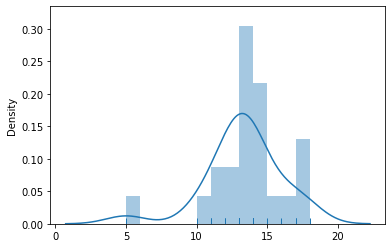

In [56]:
# PLot the distribution of data_words
import seaborn as sns

sns.distplot(data_words, kde=True, rug=True);

##c

In [20]:
# #count word "analytics"
analytics_count = words['analytics']
print(analytics_count)

10


In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
# Determine bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(line_list)  
features = (vectorizer.get_feature_names()) 
  
# Determine top ranking features 
sums = X1.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(7)) 



Words : 
                  term  rank
80     data analytics     6
79      data analysis     5
85          data with     2
100  exploratory data     2
267          with the     2
159    numerical data     2
184        people use     1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
#Probability “analytics” occurring after the word “data”
import re

from collections import Counter
bigramwords = re.findall('\w+', text)
bigram_counts = Counter(zip(bigramwords,bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]
print(f"The probability of the word “analytics” occurring after “data”: {data_analytics_count/analytics_count}")

The probability of the word “analytics” occurring after “data”: 0.6
